<a href="https://colab.research.google.com/github/dboerner1/nba-eda-project/blob/main/Dean_Boerner_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting The Data Ready

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filepath = "/content/drive/MyDrive/NBA Data"
basic_raw = pd.DataFrame()
year = 1954

In [ ]:
while year <= 2021:
  file = filepath+'/season_'+str(year)+'_basic.csv'
  import_data = pd.read_csv(file)
  basic_raw = basic_raw.append(import_data, ignore_index=False)
  year = year + 1

In [ ]:
all_basic_edited = basic_raw.copy()

In [ ]:
# adding columns
all_basic_edited['day'] = all_basic_edited.date.transform(lambda x: x[0:10])
all_basic_edited['time'] = all_basic_edited.date.transform(lambda x: x[11:])
all_basic_edited['year'] = all_basic_edited['day'].transform(lambda x: int(x[0:4]))
all_basic_edited['Away_Deficit'] = all_basic_edited.home_score - all_basic_edited.away_score

In [ ]:
# filtering to data from 2013 to present day
since_2013 = all_basic_edited['year'] >= 2013

In [ ]:
all_basic_edited_since_2013 = all_basic_edited[since_2013]

In [ ]:
# Creating dummy variable columns to sum win totals later on
def home_win_check(s):
  if s >= 0:
    return 1
  else:
    return 0

In [ ]:
def away_win_check(s):
  if s == 0:
    return 1
  else:
    return 0

In [ ]:
all_basic_edited_since_2013['home_win'] = all_basic_edited_since_2013.Away_Deficit.apply(home_win_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
all_basic_edited_since_2013['away_win'] = all_basic_edited_since_2013.home_win.apply(away_win_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
all_basic_edited_since_2013['Away_Deficit1'] = all_basic_edited_since_2013['away_score'] - all_basic_edited_since_2013['home_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# taking the arithmetic mean of relevant dummies from relevant groupby objects for first visualization
average_home_margin = all_basic_edited_since_2013.groupby(by=['home_team'], as_index=False)['Away_Deficit'].mean()
average_away_deficits = all_basic_edited_since_2013.groupby(by=['away_team'], as_index=False)['Away_Deficit1'].mean()

In [ ]:
# Putting those means in one DataFrame and renaming columns
average_home_margin['Away_Margin'] = average_away_deficits['Away_Deficit1']

In [ ]:
average_home_margin.rename(columns={'Away_Deficit': 'Home_Margin'}, inplace=True)

# Visualization 1: Home Court Advantages

In [ ]:
average_margins = average_home_margin.copy()

In [ ]:
# Finding the difference in averages for the visualization
average_margins['home_court_advantage'] = average_margins['Home_Margin'] - average_margins['Away_Margin']

In [ ]:
average_margins_filtered = average_margins.copy()

In [ ]:
# removing non-existent teams
isnt_old_team1 = average_margins_filtered['home_team'] != 'Charlotte Bobcats'
isnt_old_team2 = average_margins_filtered['home_team'] != 'New Orleans Hornets'

In [ ]:
average_margins_filtered = average_margins_filtered[isnt_old_team1 & isnt_old_team2]

In [ ]:
average_margins_filtered.sort_values(by=['home_court_advantage'], ascending=False, inplace=True)

In [ ]:
# grabbing the top 5 and bottom 5 teams
top_and_bottom_teams = ['Denver Nuggets', 'Washington Wizards', 'Philadelphia 76ers', 'Portland Trail Blazers', 'Utah Jazz', 'Orlando Magic', 'Memphis Grizzlies', 'Dallas Mavericks', 'Sacramento Kings', 'Chicago Bulls']

In [ ]:
top_and_bottom_teams_margins = average_margins_filtered[average_margins_filtered.home_team.isin(top_and_bottom_teams)]

In [ ]:
# putting the remaining 20 teams in another list and then dataframe
all_other_teams = []
for team in average_margins_filtered.home_team:
  if team not in top_and_bottom_teams:
    all_other_teams.append(team)

In [ ]:
all_other_teams_margins = average_margins_filtered[average_margins_filtered.home_team.isin(all_other_teams)]

In [ ]:
# finding 20-team averages for final visualization
print(all_other_teams_margins.Home_Margin.mean())
print(all_other_teams_margins.Away_Margin.mean())
print(all_other_teams_margins.home_court_advantage.mean())

2.834760289119374
-2.0503906469521413
4.885150936071516


In [ ]:
other_teams_averages = {'home_team': 'League Average*', 'Home_Margin': 2.834760289119374, 'Away_Margin': -2.0503906469521413, 'home_court_advantage': 4.885150936071516}

In [ ]:
other_teams_averages_df = pd.DataFrame(data=other_teams_averages, index=[31])

In [ ]:
top_and_bottom_teams_graph_data = pd.concat([top_and_bottom_teams_margins, other_teams_averages_df])

In [ ]:
top_and_bottom_teams_graph_data.sort_values(by=['home_court_advantage'], ascending=False, inplace=True)

In [ ]:
top_and_bottom_teams_graph_data

,home_team,Home_Margin,Away_Margin,home_court_advantage
8,Denver Nuggets,4.327684,-2.675439,7.003122
31,Washington Wizards,2.844193,-3.926554,6.770746
24,Philadelphia 76ers,0.628571,-5.974359,6.602930
26,Portland Trail Blazers,4.447592,-1.761905,6.209497
30,Utah Jazz,5.128205,-0.933526,6.061731
31,League Average*,2.834760,-2.050391,4.885151
23,Orlando Magic,-2.709199,-6.492711,3.783513
15,Memphis Grizzlies,1.338068,-2.390449,3.728518
7,Dallas Mavericks,2.420749,-1.200581,3.621331
27,Sacramento Kings,-1.688427,-5.241983,3.553555


In [ ]:
y_ticks = ('Denver Nuggets', 'Washington Wizards', 'Philadelphia 76ers', 'Portland Trail Blazers', 'Utah Jazz', 'League Average*', 'Orlando Magic', 'Memphis Grizzlies', 'Dallas Mavericks', 'Sacramento Kings', 'Chicago Bulls')
y_labels = ('(1) Denver Nuggets', '(2) Washington Wizards', '(3) Philadelphia 76ers', '(4) Portland Trail Blazers', '(5) Utah Jazz', '(...) League Average*', '(26) Orlando Magic', '(27) Memphis Grizzlies', '(28) Dallas Mavericks', '(29) Sacramento Kings', '(30) Chicago Bulls')

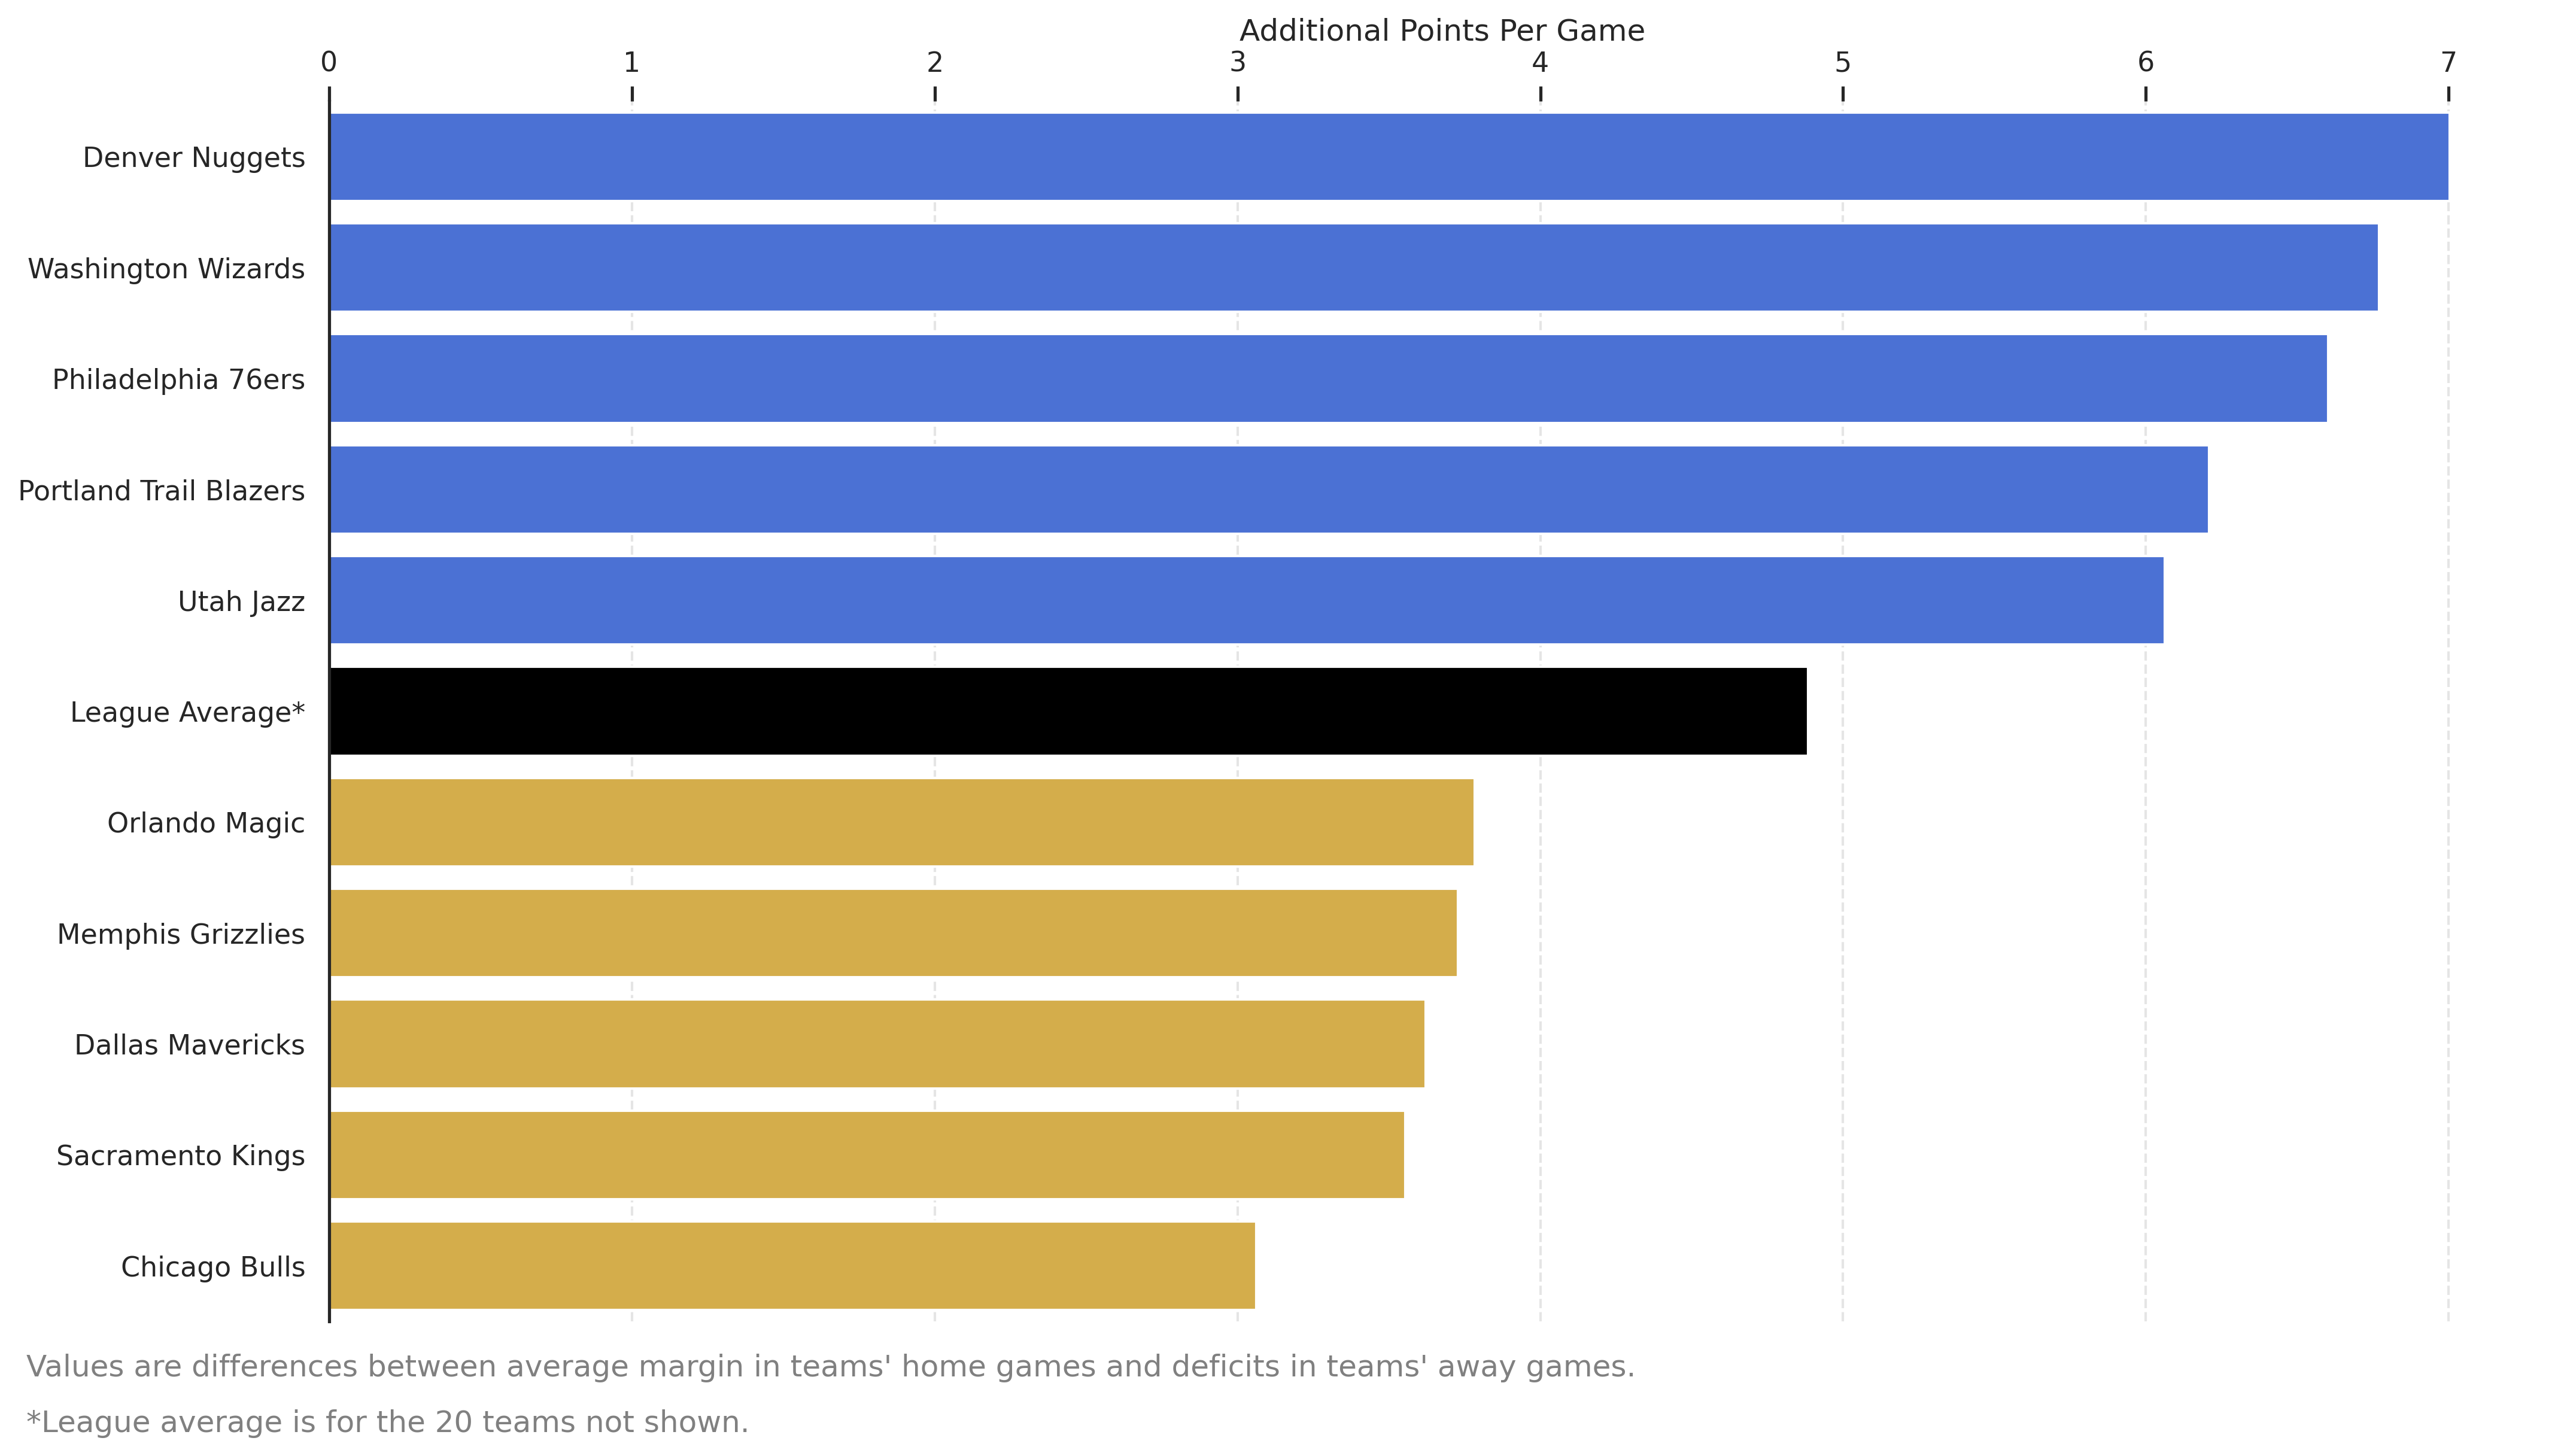

In [ ]:
new_bar, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x="home_court_advantage", 
            y="home_team", 
            data=top_and_bottom_teams_graph_data, 
            palette={
                'Denver Nuggets': '#3467eb',
                'Washington Wizards': '#3467eb',
                'Philadelphia 76ers': '#3467eb',
                'Portland Trail Blazers': '#3467eb',
                'Utah Jazz': '#3467eb',
                'Orlando Magic': '#ebb734',
                'Memphis Grizzlies': '#ebb734',
                'Dallas Mavericks': '#ebb734',
                'Sacramento Kings': '#ebb734',
                'Chicago Bulls': '#ebb734',
                'League Average*': '#000000',
            })
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
sns.despine(top=True, bottom=True)
ax.set(ylabel=None, xlabel='Additional Points Per Game')
ax.text(x=-1, y=11.5, s='*League average is for the 20 teams not shown.', size='medium', color='#808080', weight='normal', ha='left')
ax.text(x=-1, y=11, s='Values are differences between average margin in teams\' home games and deficits in teams\' away games.', size='medium', color='#808080', weight='normal', ha='left')
ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
plt.tick_params(left = False)

In [ ]:
new_bar.savefig('home_court_advantage.png')

# Visualization 2 Prep: Top Weekend Advantages

In [ ]:
# grouping by home_team and weekday for performance breakdown
home_winning_percent_by_day = all_basic_edited_since_2013.groupby(by=['home_team', 'weekday'], as_index=False)['home_win'].mean()

In [ ]:
is_Saturday = home_winning_percent_by_day.weekday == 'Saturday'
is_Sunday = home_winning_percent_by_day.weekday == 'Sunday'

In [ ]:
# finding total number of home wins and home games per team for an overall winning percentage
home_wins_per_team = all_basic_edited_since_2013.groupby(by=['home_team'], as_index=False)['home_win'].sum()

In [ ]:
home_games_per_team = all_basic_edited_since_2013.groupby(by=['home_team'], as_index=False)['date'].count()

In [ ]:
baseline_home_winning_percent = pd.merge(home_wins_per_team, home_games_per_team)

In [ ]:
baseline_home_winning_percent['home_win_pct'] = baseline_home_winning_percent['home_win'] / baseline_home_winning_percent['date']

In [ ]:
# filtering to weekend performance for comparisons to overall performance
home_weekend_winning_percent_by_day = home_winning_percent_by_day[is_Saturday | is_Sunday]

In [ ]:
home_weekend_winning_percent_by_day.rename(columns={'home_win': 'Day_Specific_Pct'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
modified_home_weekend_winning_percent_by_day = pd.merge(home_weekend_winning_percent_by_day, baseline_home_winning_percent, on='home_team')

In [ ]:
modified_home_weekend_winning_percent_by_day.drop(['home_win', 'date'], axis=1, inplace=True)

In [ ]:
total_home_weekend_winning_percent = modified_home_weekend_winning_percent_by_day.groupby(by=['home_team'], as_index=False)['Day_Specific_Pct'].mean()

In [ ]:
total_home_weekend_winning_percent['weekday'] = total_home_weekend_winning_percent.home_team.transform(lambda x: 'Weekend')

In [ ]:
# combining overall winning percentages with weekend-specific winning percentages for comparisons below
three_part_weekend_winning = pd.concat([modified_home_weekend_winning_percent_by_day, total_home_weekend_winning_percent])

In [ ]:
three_part_weekend_winning['day_advantage'] = three_part_weekend_winning['Day_Specific_Pct'] - three_part_weekend_winning['home_win_pct']

In [ ]:
# filtering the combined DF to current teams
isnt_NO_hornets = three_part_weekend_winning.home_team != 'New Orleans Hornets'
isnt_bobcats = three_part_weekend_winning.home_team != 'Charlotte Bobcats'
three_part_weekend_winning = three_part_weekend_winning[isnt_NO_hornets & isnt_bobcats]

In [ ]:
# filtering that to the teams with the highest weekend boosts
five_teams = three_part_weekend_winning.home_team.isin(['Atlanta Hawks', 'Miami Heat', 'Houston Rockets', 'Philadelphia 76ers', 'Golden State Warriors'])
top_five_weekend_winning = three_part_weekend_winning[five_teams]

In [ ]:
overall_winning = {'home_team': ['Atlanta Hawks', 'Golden State Warriors', 'Houston Rockets', 'Miami Heat', 'Philadelphia 76ers'],
                   'weekday': ['Overall', 'Overall', 'Overall', 'Overall', 'Overall'],
                   'Day_Specific_Pct': [.563025, .732648, .671348, .648352, .531429],
                   'home_win_pct': [.563025, .732648, .671348, .648352, .531429]}

In [ ]:
overall_data_frame = pd.DataFrame(overall_winning)

In [ ]:
overall_data_frame['day_advantage'] = overall_data_frame['Day_Specific_Pct'] - overall_data_frame['home_win_pct']

In [ ]:
top_five_weekend_winning_overall = pd.concat([top_five_weekend_winning, overall_data_frame])

In [ ]:
top_five_weekend_winning_overall_filtered = top_five_weekend_winning_overall[top_five_weekend_winning_overall.weekday.isin(['Overall', 'Weekend'])]

I opt for my final data to compare weekends with weekdays directly instead of comparing weekends to overall numbers, thereby avoiding overlap. I go through a similar process below to find weekday winning percentage -- Monday through Friday. 

In [ ]:
home_games_per_day = all_basic_edited_since_2013.groupby(by=['home_team', 'weekday'], as_index=False)['date'].count()

In [ ]:
home_games_per_weekday = home_games_per_day[home_games_per_day.weekday.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [ ]:
# I reaggregate the above-created DataFrame to find total number of weekday games
home_games_per_week = home_games_per_weekday.groupby(by=['home_team'], as_index=False)['date'].sum()

In [ ]:
home_wins_per_day = all_basic_edited_since_2013.groupby(by=['home_team', 'weekday'], as_index=False)['home_win'].sum()

In [ ]:
home_wins_per_weekday = home_wins_per_day[home_wins_per_day.weekday.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [ ]:
# I reaggregate the above-created DataFrame to find total number of weekday wins
home_wins_per_week = home_wins_per_weekday.groupby(by=['home_team'], as_index=False)['home_win'].sum()

In [ ]:
weekday_winning_percentage = pd.merge(home_wins_per_week, home_games_per_week)

In [ ]:
weekday_winning_percentage['weekday_winning_pct'] = weekday_winning_percentage['home_win'] / weekday_winning_percentage['date']

In [ ]:
top_five_teams = weekday_winning_percentage.home_team.isin(['Atlanta Hawks', 'Golden State Warriors', 'Miami Heat', 'Philadelphia 76ers', 'Houston Rockets'])
top_five_teams_on_weekdays = weekday_winning_percentage[top_five_teams]

In [ ]:
# I create a DataFrame with weekday-total-specific rows for teams to add it to weekend-total-specific rows for teams
weekdays = {'home_team': ['Atlanta Hawks', 'Golden State Warriors', 'Houston Rockets', 'Miami Heat', 'Philadelphia 76ers'],
            'weekday': ['Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday'],
            'Day_Specific_Pct': [.530769, .722034, .657480, .631179, .524904],
            'home_win_pct': [.563025, .732648, .671348, .648352, .531429]}

In [ ]:
weekdays_df = pd.DataFrame(weekdays)

In [ ]:
weekdays_df['day_advantage'] = weekdays_df['Day_Specific_Pct'] - weekdays_df['home_win_pct']

In [ ]:
top_five_by_day = pd.concat([top_five_weekend_winning_overall, weekdays_df])

In [ ]:
# For my direct weekday to weekend comparison, I filter out individual days
top_five_by_day_filtered = top_five_by_day[top_five_by_day.weekday.isin(['Weekday', 'Weekend'])]

In [ ]:
just_weekend_weekend_winning = three_part_weekend_winning[three_part_weekend_winning.weekday.isin(['Weekend'])]

I backtrack a little below to find league-wide average weekend home performance relative to weekday home performance, finally adding that to a final DataFrame for my visualization.

In [ ]:
isnt_cats = weekday_winning_percentage['home_team'] != 'Charlotte Bobcats' 
isnt_NO_hornets = weekday_winning_percentage['home_team'] != 'New Orleans Hornets'

In [ ]:
weekday_winning_percentage = weekday_winning_percentage[isnt_cats & isnt_NO_hornets]

In [ ]:
just_weekend_weekend_winning['weekday_pct'] = weekday_winning_percentage['weekday_winning_pct']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
just_weekend_weekend_winning['weekend_boost'] = just_weekend_weekend_winning['Day_Specific_Pct'] - just_weekend_weekend_winning['weekday_pct']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(just_weekend_weekend_winning.Day_Specific_Pct.mean())
print(just_weekend_weekend_winning.weekday_pct.mean())
print(just_weekend_weekend_winning.weekend_boost.mean())

0.554987486997519
0.5789802983747943
-0.02399281137727539


In [ ]:
averages = {'home_team': ['League Average', 'League Average'],
            'weekday': ['Weekday', 'Weekend'],
            'Day_Specific_Pct': [.578980, .554987],
            'home_win_pct': [0, 0],
            'day_advantage': [0, 0]}

In [ ]:
league_averages_df = pd.DataFrame(averages)

In [ ]:
top_five_by_day_filtered_with_average = pd.concat([top_five_by_day_filtered, league_averages_df])

# Visualization 2

[Text(0, 1, 'Weekends'), Text(1, 1, 'Weekdays')]

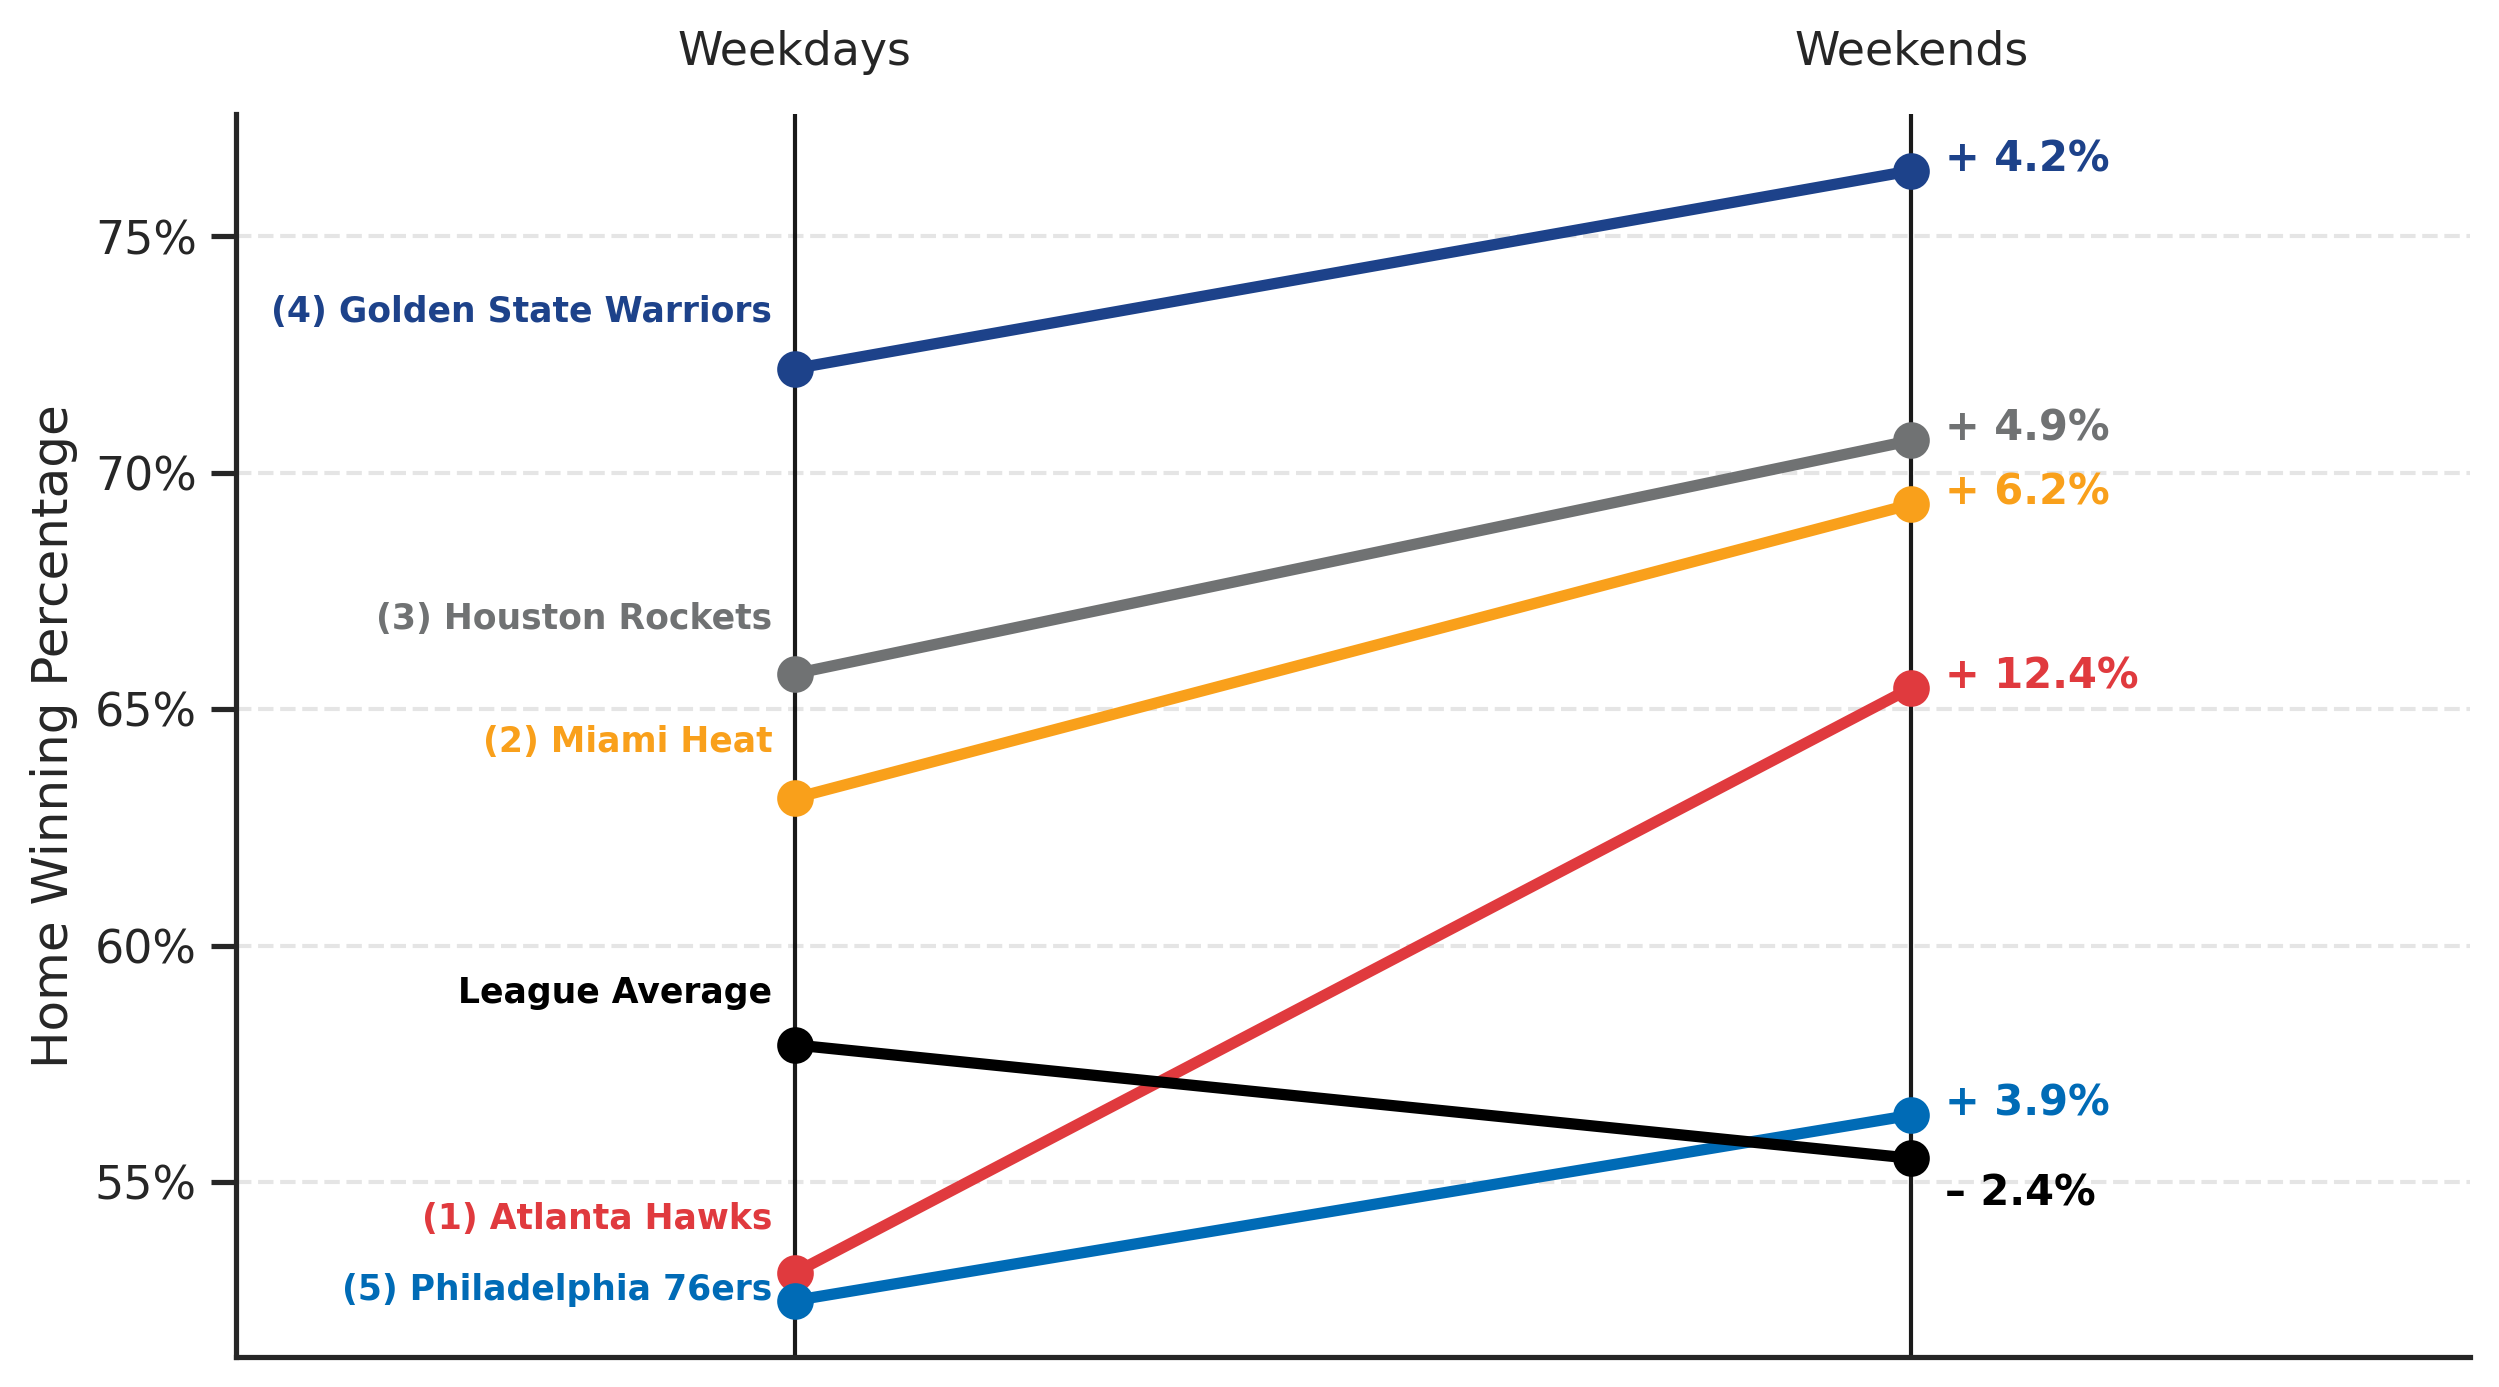

In [ ]:
HAWKS_RED = '#E03A3E'
WARRIORS_BLUE = '#1D428A'
ROCKETS_SILVER = '#C4CED4'
ROCKETS_SILVER2 = '#707273'
HEAT_YELLOW = '#F9A01B'
SIXERS_BLUE = '#006BB6'
SIXERS_NAVY = '#002B5C'
LIGHT_BLUE = '#c6e2ff'
SPRING_GREEN = '#00ff89'

sns.set_theme(style='white')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

nba_slope_chart = sns.catplot(
    x='weekday', 
    y='Day_Specific_Pct', 
    hue='home_team', 
    data=top_five_by_day_filtered_with_average,
    kind="point", 
    aspect=1.7,
    palette={
        'Atlanta Hawks': HAWKS_RED,
        'Miami Heat': HEAT_YELLOW,
        'Houston Rockets': ROCKETS_SILVER2,
        'Philadelphia 76ers': SIXERS_BLUE,
        'Golden State Warriors': WARRIORS_BLUE,
        'League Average': '#000000'
    },
    legend=False
)

nba_slope_chart.set(ylabel='Home Winning Percentage', xlabel=None)

ax = nba_slope_chart.axes[0,0]
ax.invert_xaxis()



ax.text(x=1.02, y=.732, s='(4) Golden State Warriors', size='x-small', color=WARRIORS_BLUE, weight='semibold', ha='right')
ax.text(x=1.02, y=.667, s='(3) Houston Rockets', size='x-small', color=ROCKETS_SILVER2, weight='semibold', ha='right')
ax.text(x=1.02, y=.641, s='(2) Miami Heat', size='x-small', color=HEAT_YELLOW, weight='semibold', ha='right')
ax.text(x=1.02, y=.588, s='League Average', size='x-small', color='#000000', weight='semibold', ha='right')
ax.text(x=1.02, y=.540, s='(1) Atlanta Hawks', size='x-small', color=HAWKS_RED, weight='semibold', ha='right')
ax.text(x=1.02, y=.525, s='(5) Philadelphia 76ers', size='x-small', color=SIXERS_BLUE, weight='semibold', ha='right')
ax.text(x=-.03, y=0.763889, s='+ 4.2%', size='small', color=WARRIORS_BLUE, weight='semibold', ha='left')
ax.text(x=-.03, y=0.706826, s='+ 4.9%', size='small', color=ROCKETS_SILVER2, weight='semibold', ha='left')
ax.text(x=-.03, y=0.693333, s='+ 6.2%', size='small', color=HEAT_YELLOW, weight='semibold', ha='left')
ax.text(x=-.03, y=0.654505, s='+ 12.4%', size='small', color=HAWKS_RED, weight='semibold', ha='left')
ax.text(x=-.03, y=0.564111, s='+ 3.9%', size='small', color=SIXERS_BLUE, weight='semibold', ha='left')
ax.text(x=-.03, y=0.544987, s='– 2.4%', size='small', color='#000000', weight='semibold', ha='left')

ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
ax.axes.tick_params(axis='x', labelbottom=False, labeltop=True, bottom=False)
sns.despine(top=True, bottom=False)

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0, symbol='%', is_latex=False))
ax.set_xticklabels(['Weekends', 'Weekdays'])

In [ ]:
nba_slope_chart.savefig('weekend_boost1.png')

# Checking for Outliers
- In my exploration stage I came across a couple of interesting outliers, including that the Utah Jazz have played only two home games on Sunday since 2013. Below, I double-check that there isn't somehow a team or teams that have only a few weekend games with which to compare their weekday games to. There are not, as shown below. 

In [ ]:
all_basic_edited_since_2013.head()

,date,weekday,home_team,home_score,away_team,away_score,attendance,overtime,remarks,day,time,year,Away_Deficit,home_win,away_win,Away_Deficit1
456,2013-01-01T18:00:00,Tuesday,Washington Wizards,94,Dallas Mavericks,103,14456.0,NaN,NaN,2013-01-01,18:00:00,2013,-9,0,1,9
457,2013-01-01T19:30:00,Tuesday,New York Knicks,100,Portland Trail Blazers,105,14456.0,NaN,NaN,2013-01-01,19:30:00,2013,-5,0,1,5
458,2013-01-01T19:30:00,Tuesday,Detroit Pistons,103,Sacramento Kings,97,14456.0,NaN,NaN,2013-01-01,19:30:00,2013,6,1,0,-6
459,2013-01-01T20:00:00,Tuesday,New Orleans Hornets,86,Atlanta Hawks,95,14456.0,NaN,NaN,2013-01-01,20:00:00,2013,-9,0,1,9
460,2013-01-01T21:00:00,Tuesday,Denver Nuggets,92,Los Angeles Clippers,78,14456.0,NaN,NaN,2013-01-01,21:00:00,2013,14,1,0,-14


In [ ]:
test = all_basic_edited_since_2013.groupby(['home_team', 'weekday'], as_index=False)['date'].count()

In [ ]:
test.head()

,home_team,weekday,date
0,Atlanta Hawks,Friday,72
1,Atlanta Hawks,Monday,53
2,Atlanta Hawks,Saturday,60
3,Atlanta Hawks,Sunday,37
4,Atlanta Hawks,Thursday,24


In [ ]:
weeknights_test = test[test.weekday.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends_test = test[test.weekday.isin(['Saturday', 'Sunday'])]

In [ ]:
weeknights_test.head()

,home_team,weekday,date
0,Atlanta Hawks,Friday,72
1,Atlanta Hawks,Monday,53
4,Atlanta Hawks,Thursday,24
5,Atlanta Hawks,Tuesday,35
6,Atlanta Hawks,Wednesday,76


In [ ]:
weeknights_test_grouped = weeknights_test.groupby(['home_team'], as_index=False)['date'].sum()
weekends_test_grouped = weekends_test.groupby(['home_team'], as_index=False)['date'].sum()

In [ ]:
weeknights_test_grouped.head()

,home_team,date
0,Atlanta Hawks,260
1,Boston Celtics,288
2,Brooklyn Nets,264
3,Charlotte Bobcats,51
4,Charlotte Hornets,195


In [ ]:
weekends_test_grouped.sort_values(by=['date'], ascending=True).head()

,home_team,date
19,New Orleans Hornets,5
3,Charlotte Bobcats,14
20,New Orleans Pelicans,69
1,Boston Celtics,70
30,Utah Jazz,71
